In [1]:
import numpy 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder as encoder

from sklearn.datasets import make_classification

from sklearn.utils import resample

#import snowballstemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /home/mohit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mohit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mohit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#importing the data 
data = pd.read_csv('train_data.txt',  delimiter=":::"  , names=['Title', 'Genre', 'Description'],encoding='latin-1' )

In [3]:
data

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [4]:
data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [6]:
#total number of null values in each column having ????
data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

#  Visualizing and cleaning the data 

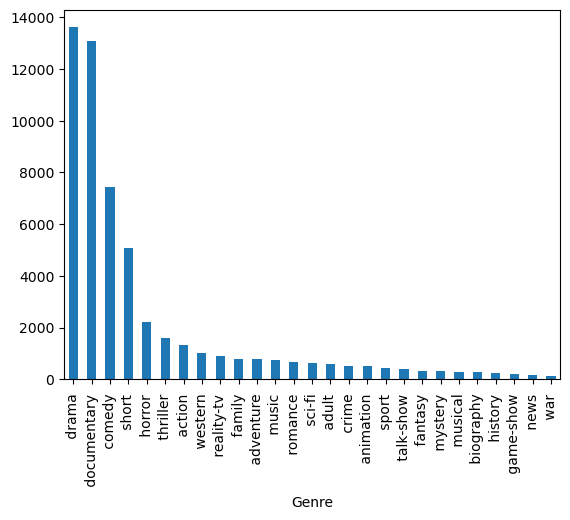

In [7]:
data['Genre'].value_counts().plot(kind='bar')
plt.show()

In [8]:
def get_year(title):
        year = (title[-6:-2])
        return year
    
    
years = data['Title'].apply(get_year)


In [9]:
def clearn_year(year):
    #check if year is not a 4 digit number using re
    if not re.match(r'[0-9]{4}', str(year)):
        return 0 
    else:
        return int(year)

years = years.apply(clearn_year)

In [10]:
data["years"] = years

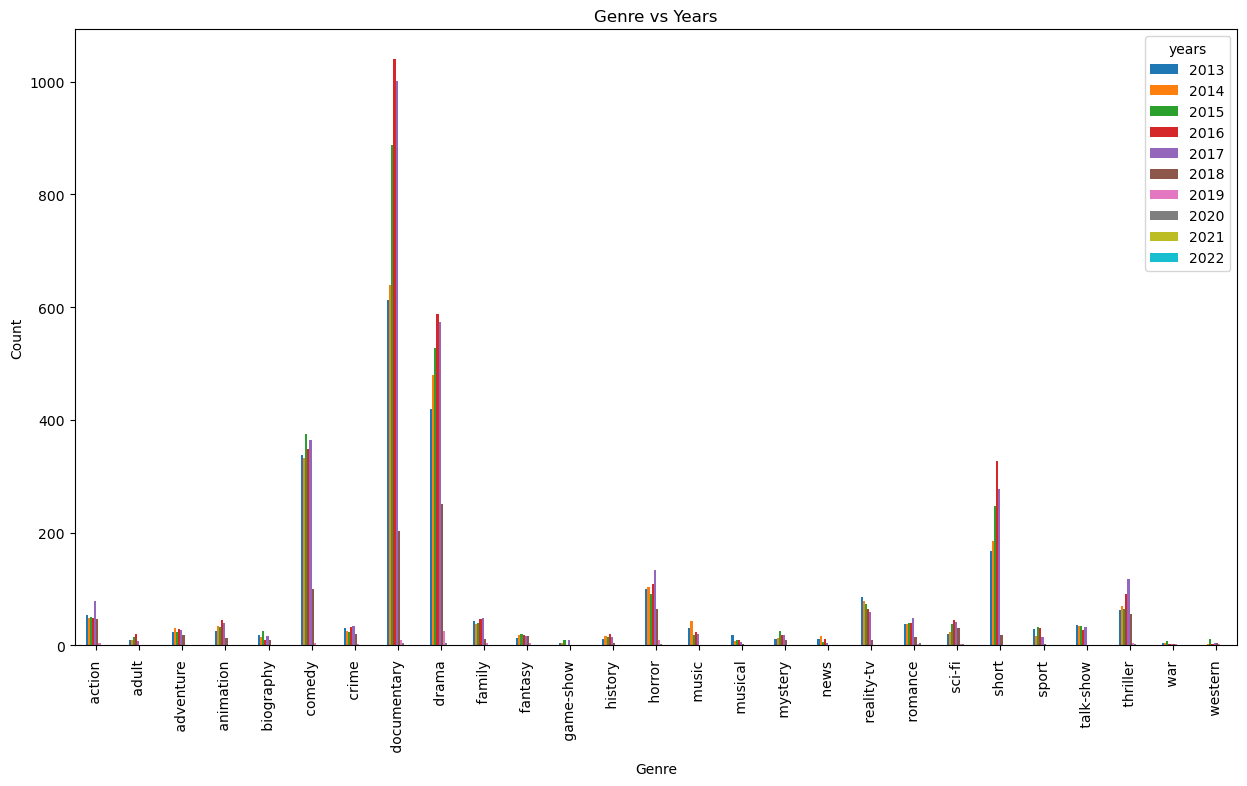

In [11]:
data[data.years > 2012].groupby(['Genre','years']).count()['Title'].unstack().plot(kind='bar',figsize=(15,8))
plt.title('Genre vs Years')
plt.ylabel('Count')
plt.show()


<AxesSubplot:xlabel='years'>

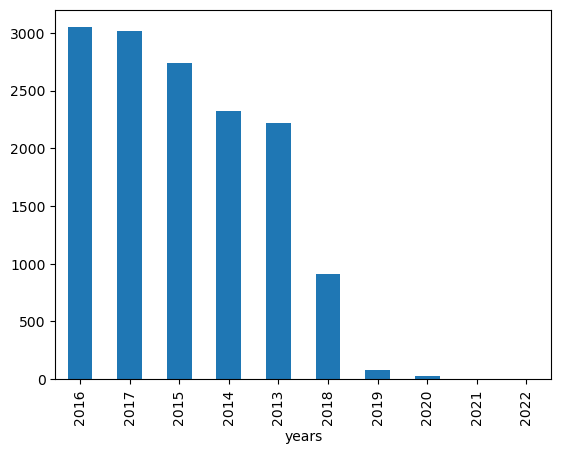

In [12]:
data[data.years > 2012].value_counts('years').plot(kind='bar')

In [13]:
data['Genre'].value_counts()


Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

In [14]:
data[data["Genre"] =="" ]
#there are zero null values in genre column 

,Title,Genre,Description,years


In [15]:
#check null values in description
data[data['Description'] ==""]

,Title,Genre,Description,years


In [16]:
#check where description length is less than 10
data[data['Description'].str.len() < 20]
#there aer no null values in the Description column


,Title,Genre,Description,years


In [17]:
def clean_desciption(text):
    text = text.lower()
    stemmer = PorterStemmer()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    for i in range(len(tokens)):
        if tokens[i] not in stop_words and tokens[i].isalpha():
            tokens[i] = stemmer.stem(tokens[i])
        
    text = " ".join(tokens)
    return text

data['clean_description'] = data['Description'].apply(clean_desciption)


In [18]:
data

,Title,Genre,Description,years,clean_description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,2009,listen in to a convers between his doctor and ...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,1997,a brother and sister with a past incestu relat...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1980,as the bu empti the student for their field tr...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1915,"to help their unemploy father make end meet , ..."
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,2007,the film 's titl refer not only to the un-reco...
...,...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,1953,this short-lived nbc live sitcom center on bon...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,0,the next gener of exploit . the sister of kapa...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",2008,"ze bestaan echt , is a stand-up comedi about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,1944,walter and vivian live in the countri and have...


In [19]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
#import logistic regression classifier
from sklearn.linear_model import LogisticRegression





In [20]:
X =  data[['Title',"clean_description"]]
y = data['Genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train['clean_description'])
X_test = vectorizer.transform(X_test['clean_description'])



clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)



In [21]:
#test the accuracy of the model on the x_test and y_test data
accuracy_score(y_test, y_pred)

0.5812044637093056

In [22]:
# Assuming you have imported the necessary libraries and defined the required functions and objects.

title = input("Enter the title of the movie: ")
description = input("Enter the description of the movie: ")

# Preprocess the input
title = clean_desciption(title)
description = clean_desciption(description)

# Convert the input into a vector
input_text = title + " " + description
input_vector = vectorizer.transform([input_text])

# Predict the genre
predicted_genre_label = clf.predict(input_vector)[0]

print("Predicted Genre:", predicted_genre_label)